In [20]:
using LinearAlgebra
using Plots
using Pkg 
#Pkg.add("Random")
using Random

El Hamiltoniano que se nos plantea en el caso para $N = 3$ qubits es

$H = A_1 \cos(\theta) + A_2 \sin(\theta)$

donde $A_1$ y $A_2$ son operadores aleatorios, en el paper se realizó lo siguiente 

- Choose different eigenstates $\ket{\varphi_n}$ and plot their expectations on $A_1$ and $A_2$ 
- Plot the energy of $H$ with respect to the eigenstates $\ket{\varphi_n}$ as a function of $\theta$, for $n=0,...,7$


In [148]:
N = 3 # number of qubits
d = 2^N # dimension of the Hilbert space
#A1 = rand(d,d) #+ im*randn(d,d)
#A2 = rand(d,d) #+ im*randn(d,d)

sigmax = [0 1; 1 0]
sigmay = [0 -im; im 0]
sigmaz = [1 0; 0 -1]
id= I(2)


Sigmas = Dict(1 => sigmax, 2 => sigmay, 3 => sigmaz) #Diccionario para llamar a las matrices de Pauli

cd = randn(3,3)
function Alocal(Particles,cd)
    k = Particles-1 # Un operador k-local es aquel que actúa sobre k partículas, en este caso hay N partículas y se aplican a N-1 
    A = zeros(2^k,2^k)
    for i in 1:3
        for j in 1:3 
            A = A + cd[i,j]*kron(Sigmas[i],Sigmas[j])
        end
    end
    return A
end


Alocal (generic function with 3 methods)

In [128]:
function AlocalGeneral(Particles)
    m = Particles-3 # m es el número extra de veces que quiero aplicar la función Kron
    C = randn(1,2^Particles*2^Particles)
    n = 3 # son 9 elementos, 3*3 = 9, |opciones|^valoresdisp = 3^2
    cd = reshape(C[1:(n*n)],n,n) 
    Alocal(3, cd)


    k = n*n +1 # El primer elemento que se debe tomar para el for que quiero realizar 

end
function MatrizAleat(N)
    # N es el número de iteraciones total, i es el número de iteración actual
    B = Sigmas[1]
    Am = c[1,N]*B
    return Am 
end

AlocalGeneral (generic function with 1 method)

In [127]:
ad = randn(1,2^5*2^5)
n = 2^2
c = reshape(ad[1:(n*n)], n, n)

4×4 Matrix{Float64}:
 -0.577832  -0.947232   1.52362    0.941486
 -0.208761   1.36425    0.949476   1.95866
  0.69871   -0.274879   0.94834    0.797654
  1.76013   -0.467942  -1.25172   -0.933146

In [ ]:
# N = 5
# c = randn(1,N)
function MatrizAleat(N)
    # N es el número de iteraciones total, i es el número de iteración actual
    B = Sigmas[1]
    Am = c[1,N]*B
    return Am 
end
#MatrizAleat(1, 3)


2×2 Matrix{Float64}:
 0.0      2.35967
 2.35967  0.0

In [22]:
x = 0.5
H = A1.*cos(c1[1]) + A2.*sin(c2[1])	
eigvec = eigen(H).vectors
eigenvecadj = adjoint(eigvec) # Matriz adjunta de eigenvectores Duda: ¿los vectores bras de este Hamiltoniano son los vectores adjuntos? 
function expectationvalue(eigvec,eigenvecadj)
    expvalueA1 = zeros(ComplexF64, d,d)
    expvalueA2 = zeros(ComplexF64, d,d)
    for i in 1:d 
        vecadji = transpose(eigenvecadj[i,:])
        for j in 1:d
            veci = eigvec[:,i]
            expvalueA1[i,j] = vecadji*A1*veci
            expvalueA2[i,j] = vecadji*A2*veci
        end
    end
    return expvalueA1, expvalueA2
end

expectationvalue (generic function with 1 method)

In [141]:
A1 = kron(I(2),Alocal(3,cd))
A2 = kron(Alocal(3,cd),I(2))

8×8 Matrix{ComplexF64}:
   1.92398+0.0im             0.0+0.0im       …        0.0+0.0im
       0.0+0.0im         1.92398+0.0im          -0.222744+1.16282im
  -1.70752-0.826253im        0.0+0.0im                0.0+0.0im
       0.0+0.0im        -1.70752-0.826253im     -0.632588-0.979904im
  0.632588-0.979904im        0.0+0.0im                0.0+0.0im
       0.0+0.0im        0.632588-0.979904im  …    1.70752-0.826253im
 -0.222744-1.16282im         0.0+0.0im                0.0+0.0im
       0.0+0.0im       -0.222744-1.16282im        1.92398+0.0im

In [149]:
function a1vsa2(xin,step,xfin, n) #n = 1 es el estado fundamental y n = 2 es el primer estado excitado, etc
    x = xin:step:xfin
    a1 = zeros(ComplexF64,length(x))
    a2 = zeros(ComplexF64,length(x))
    for i in 1:length(x)
        H = A1.*cos(x[i]) + A2.*sin(x[i])
        eigvec = eigen(H).vectors
        eigenvecadj = adjoint(eigvec) 
        rho = kron(eigvec[n,:],transpose(eigenvecadj[:,n])) # Matriz de densidad para el estado fundamental
        a1[i] = tr(rho*A1)
        a2[i] = tr(rho*A2)
    end
    return a1,a2
end

a1vsa2 (generic function with 1 method)

In [150]:
aa = a1vsa2(0,0.001,6,1)
bb = a1vsa2(0,0.001,6,2)
gg = a1vsa2(0,0.001,6,3)
#plot(imag(alpha[1]),imag(alpha[2]))

(ComplexF64[0.7919162702984699 + 0.0im, 0.8194278734386363 + 5.551115123125783e-17im, 1.1731926359238316 - 9.215718466126788e-18im, -0.010285970023637224 + 1.1709383462843448e-16im, 1.9678690757311834 - 3.003240017784847e-17im, 1.4499115823232676 - 1.3877787807814457e-17im, 1.0931415716522321 + 4.85722573273506e-17im, 0.28980947874226015 + 7.589415207398531e-18im, 0.2346932651147196 - 3.946495907847236e-17im, 2.022583829611747 + 0.0im  …  0.6986987449758629 - 2.7755575615628914e-17im, 2.504504874925004 - 2.7755575615628914e-17im, 0.41352838987395973 - 2.0816681711721685e-17im, 1.941372593327631 + 0.0im, 1.4700226416302704 - 5.551115123125783e-17im, 1.5109516184617355 - 5.551115123125783e-17im, 0.2413055008437803 - 1.734723475976807e-17im, 1.3705002021137975 - 1.1102230246251565e-16im, 1.3261047513375974 + 0.0im, 0.4745008969678187 + 2.7755575615628914e-17im], ComplexF64[0.629658959757615 - 8.326672684688674e-17im, 1.3888405283580023 - 5.551115123125783e-17im, 1.1385323093107775 + 6.548

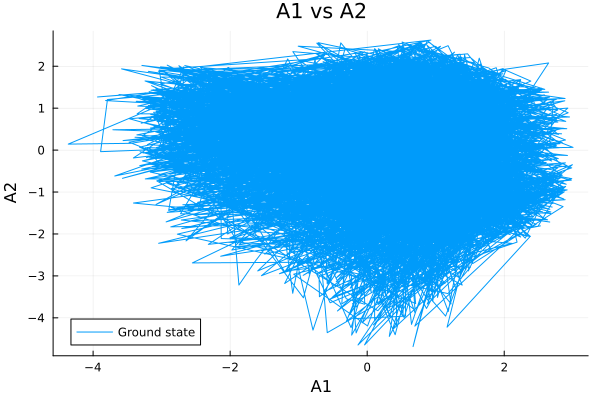

In [151]:
plot(real(aa[1]),real(aa[2]),xlabel = "A1", ylabel = "A2", label = "Ground state", title = "A1 vs A2")
#plot!(real(bb[1]),real(bb[2]),xlabel = "A1", ylabel = "A2", label = "First excited state", title = "A1 vs A2")
#plot!(real(gg[1]),real(gg[2]),xlabel = "A1", ylabel = "A2", label = "First excited state", title = "A1 vs A2")

In [152]:
function energyvsparameter(xmin,step,xmax)
    x = xmin:step:xmax
    energy = zeros(ComplexF64,d,length(x))
    for i in 1:length(x)
        H = A1.*cos(x[i]) + A2.*sin(x[i])
        energy[:,i] = eigen(H).values
    end
    return energy
end

energyvsparameter (generic function with 1 method)

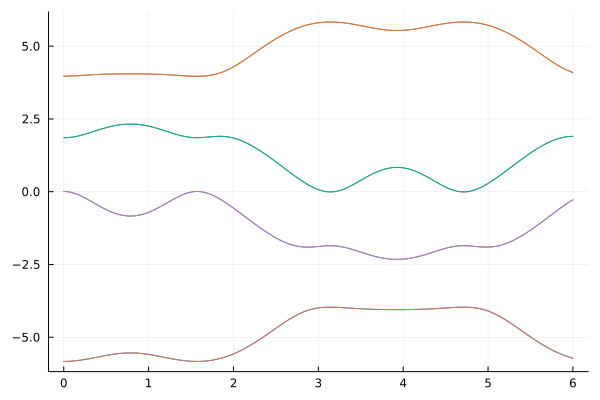

In [153]:
b = real(energyvsparameter(0,0.01,6))
x = 0:0.01:6
plot(x,b', label = false)

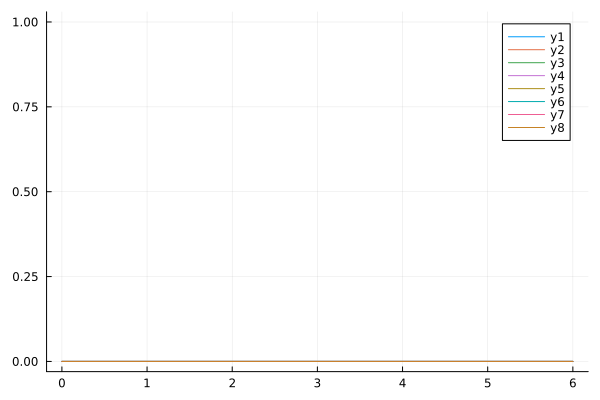

In [28]:
a = imag(energyvsparameter(0,0.01,6))
x = 0:0.01:6
plot(x,a')

In [29]:
ket_n = eigvec[:,1]
bra_n = adjoint(ket_n)

1×8 adjoint(::Vector{ComplexF64}) with eltype ComplexF64:
 3.80604e-17-0.5im  …  0.5+7.97124e-17im  0.0-0.0im

In [30]:
ket_n*bra_n

8×8 Matrix{ComplexF64}:
        0.25+0.0im           2.39653e-17-7.39881e-18im  …  0.0+0.0im
 2.39653e-17+7.39881e-18im   2.51631e-33+0.0im             0.0+0.0im
 3.11117e-17-0.25im         -7.39881e-18-2.39653e-17im     0.0+0.0im
         0.0+0.0im                   0.0-0.0im             0.0+0.0im
        0.25+1.90302e-17im   2.39653e-17-7.39881e-18im     0.0+0.0im
 1.37543e-17+1.26642e-17im    1.6933e-33+8.06943e-34im  …  0.0+0.0im
 -2.0826e-17-0.25im         -7.39881e-18-2.39653e-17im     0.0-0.0im
         0.0+0.0im                   0.0-0.0im             0.0+0.0im

In [31]:
kron(ket_n,bra_n)

8×8 Matrix{ComplexF64}:
        0.25+0.0im           2.39653e-17-7.39881e-18im  …  0.0+0.0im
 2.39653e-17+7.39881e-18im   2.51631e-33+0.0im             0.0+0.0im
 3.11117e-17-0.25im         -7.39881e-18-2.39653e-17im     0.0+0.0im
         0.0+0.0im                   0.0-0.0im             0.0+0.0im
        0.25+1.90302e-17im   2.39653e-17-7.39881e-18im     0.0+0.0im
 1.37543e-17+1.26642e-17im    1.6933e-33+8.06943e-34im  …  0.0+0.0im
 -2.0826e-17-0.25im         -7.39881e-18-2.39653e-17im     0.0-0.0im
         0.0+0.0im                   0.0-0.0im             0.0+0.0im

In [32]:
Vec = eigen(H).vectors

8×8 Matrix{ComplexF64}:
  3.80604e-17+0.5im           0.0+0.0im          0.0+0.0im  …   0.0+0.0im
 -1.47976e-17+4.79306e-17im   0.0+0.5im          0.0-0.5im      0.0-0.5im
          0.5+2.41629e-17im   0.0+0.0im          0.0+0.0im      0.0+0.0im
          0.0+0.0im          -0.5+0.0im         -0.5+0.0im     -0.5+0.0im
          0.0+0.5im           0.0+0.0im          0.0+0.0im      0.0+0.0im
 -2.53284e-17+2.75086e-17im   0.0-0.5im          0.0-0.5im  …   0.0+0.5im
          0.5-7.97124e-17im   0.0+0.0im  8.32667e-17+0.0im      0.0+0.0im
          0.0+0.0im           0.5-0.0im         -0.5-0.0im      0.5+0.0im

In [33]:
Vec1 = inv(Vec)

8×8 Matrix{ComplexF64}:
  4.70337e-17-0.5im          …   2.08167e-17+4.07352e-34im
 -1.05498e-17-1.07205e-17im              0.5+9.2602e-35im
 -4.01986e-17+6.76909e-18im             -0.5+3.52847e-34im
 -6.19697e-17+0.5im             -2.08167e-17-4.43247e-33im
 -1.49987e-16-0.5im             -2.08167e-17+4.30521e-33im
 -4.01986e-17+6.76909e-18im  …           0.5+3.52847e-34im
 -5.17845e-17-0.5im             -2.08167e-17+2.41415e-34im
  1.05498e-17+1.07205e-17im              0.5-9.2602e-35im

In [34]:
Vec1*Vec

8×8 Matrix{ComplexF64}:
          1.0+2.27237e-34im  …  -1.77186e-32+5.58396e-49im
 -3.10774e-33+2.61717e-34im     -2.77556e-16-1.64683e-48im
  8.92826e-34-2.01121e-33im      5.55112e-17-1.6714e-48im
  2.77556e-17-2.5302e-34im       8.47409e-33+3.27115e-48im
 -5.55112e-17+1.27487e-32im      7.70372e-34-2.60105e-48im
 -2.18866e-33-2.01121e-33im  …   5.55112e-17-1.31883e-49im
 -2.61927e-33+5.84109e-33im      1.15556e-32-2.51165e-49im
  4.64848e-33-8.39496e-34im              1.0-9.19021e-49im

In [35]:
Vecadj = adjoint(Vec)

8×8 adjoint(::Matrix{ComplexF64}) with eltype ComplexF64:
  3.80604e-17-0.5im  -1.47976e-17-4.79306e-17im  …   0.0-0.0im
          0.0-0.0im           0.0-0.5im              0.5+0.0im
          0.0-0.0im           0.0+0.5im             -0.5+0.0im
 -2.82829e-17+0.5im  -3.81955e-17+1.0266e-17im       0.0-0.0im
 -1.14112e-16-0.5im   7.77789e-17+3.76647e-17im      0.0-0.0im
          0.0-0.0im           0.0+0.5im          …   0.5-0.0im
 -4.49993e-17-0.5im  -4.18792e-17+5.55112e-17im      0.0-0.0im
          0.0-0.0im           0.0+0.5im              0.5-0.0im

Aparentemente el Hamiltoniano es Hermítico

In [36]:
Vec*Vecadj
Vecadj*Vec 

8×8 Matrix{ComplexF64}:
          1.0+0.0im          …   -1.0211e-17-5.26538e-18im
   1.0211e-17-5.26538e-18im     -5.55112e-17+0.0im
  3.91374e-18-2.0063e-17im      -2.77556e-17+0.0im
  2.77556e-17+6.09548e-17im      3.15727e-18-1.3591e-17im
  3.33067e-16+5.00659e-17im      7.05374e-18+2.76758e-17im
 -3.77196e-17-2.0063e-17im   …  -2.22045e-16+0.0im
 -4.44089e-16+2.88355e-17im      2.77556e-17-1.49017e-17im
  -1.0211e-17+5.26538e-18im              1.0+0.0im

In [84]:
N = 3 # Qubits
d = 2^N
Arand1 =   rand(d,d)
Arand2 =    rand(d,d)


8×8 Matrix{Float64}:
 0.392091  0.0486292  0.532588   0.521497  …  0.273062  0.452315  0.912336
 0.811899  0.734816   0.0961228  0.293115     0.45955   0.694302  0.224337
 0.826022  0.611628   0.806519   0.506633     0.93022   0.519104  0.699655
 0.227049  0.365809   0.869685   0.725323     0.769439  0.122762  0.49249
 0.876441  0.802098   0.247847   0.237198     0.626732  0.16069   0.574113
 0.66921   0.95226    0.174748   0.435562  …  0.632936  0.146624  0.137859
 0.298946  0.272337   0.631064   0.354389     0.246826  0.903435  0.410402
 0.100157  0.330525   0.178072   0.25669      0.623774  0.238517  0.129288

In [85]:
a = 0 # Valor inicial Parámetro θ
b = 6 # Valor final Parámetro θ
x = range(a, stop = b, step = 0.001)
Vals = zeros(ComplexF64,2^N, length(x))
for i in 1:length(x)
    Hrand = Arand1.*cos(x[i]) + Arand2.*sin(x[i])
    Vals[:,i] = eigen(Hrand).values
end
Vals 

8×6001 Matrix{ComplexF64}:
 -0.312949-0.318717im  -0.312601-0.318327im  …  -0.391718-0.359117im
 -0.312949+0.318717im  -0.312601+0.318327im     -0.391718+0.359117im
 -0.244453-0.489538im  -0.244205-0.489338im     -0.332118-0.608628im
 -0.244453+0.489538im  -0.244205+0.489338im     -0.332118+0.608628im
 -0.243885+0.0im        -0.24373+0.0im          -0.250846+0.0im
   0.24476+0.0im        0.244529+0.0im       …   0.280618+0.0im
  0.616805+0.0im        0.617342+0.0im           0.450686+0.0im
   3.59778+0.0im         3.60135+0.0im            2.48348+0.0im

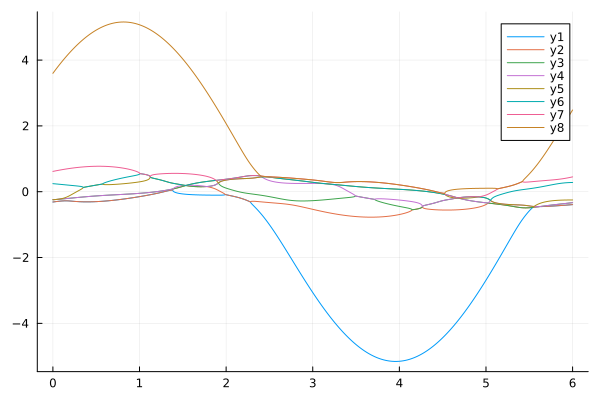

In [86]:
plot(x,real(Vals'))